# Part I - Ford GoBike System Data Exploration
## by Nachiket Dixit

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, print statistics
gobike = pd.read_csv('fordgobike-tripdata.csv')

In [4]:
gobike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [5]:
# high-level overview of data shape and composition
print(gobike.shape)
gobike.dtypes

(183412, 16)


duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
# descriptive statistics for numeric variables
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

There are 1,83,412 records in the dataset with 16 features. Most variables are numeric in nature but there are some categorical variables as well.

### What is/are the main feature(s) of interest in your dataset?

The main interest is to figure out what variables are best for predicting the average duration of trips taken in terms of time.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that trip time: time of day, day of the week, or month of the year and user type will have the strongest effect on trip duration. I also think that member gender variable will have some effect on trip duration.

## Univariate Exploration

Let's start by looking at the distribution of the main variable of interest: duration.

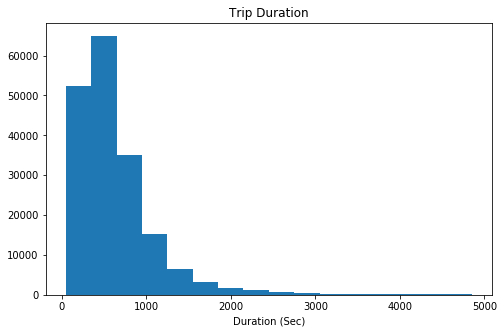

In [7]:
# starting with a standard-scaled plot for duration
bins = np.arange(50, 5000, 300)
plt.figure(figsize=[8, 5])
plt.hist(data = gobike, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (Sec)')
plt.title('Trip Duration')
plt.show();

In [8]:
# checking summary stats of the log for duration
np.log10(gobike['duration_sec'].describe())

count    5.263428
mean     2.860984
std      3.253917
min      1.785330
25%      2.511883
50%      2.710963
75%      2.900913
max      4.931682
Name: duration_sec, dtype: float64

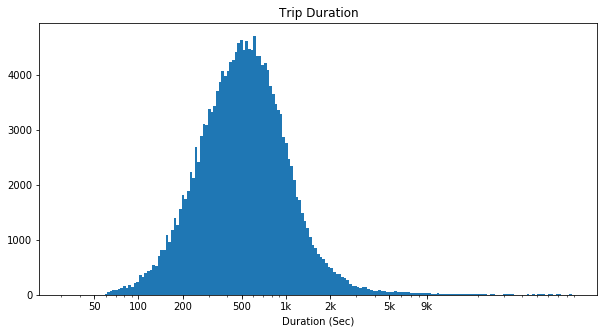

In [9]:
# there's a long tail in the distribution, so putting it on a log scale instead
log_binsize = 0.018
bins = 10 ** np.arange(1.5, np.log10(gobike['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = gobike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([50, 100, 200, 500, 1e3, 2e3, 5e3, 9e3], [50, 100, 200, 500, '1k', '2k', '5k', '9k'])
plt.xlabel('Duration (Sec)')
plt.title('Trip Duration')
plt.show();

Duration has a long-tailed distribution, with almost all trips below 1K sec, and few on the higher end. When plotted on a log-scale, the duration distribution looks unimodal, with highest peak around 500.

In [10]:
gobike['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [11]:
category_remove = ['Other']
gobike = gobike[~gobike['member_gender'].isin(category_remove)]
gobike['member_gender'].value_counts()

Male      130651
Female     40844
Name: member_gender, dtype: int64

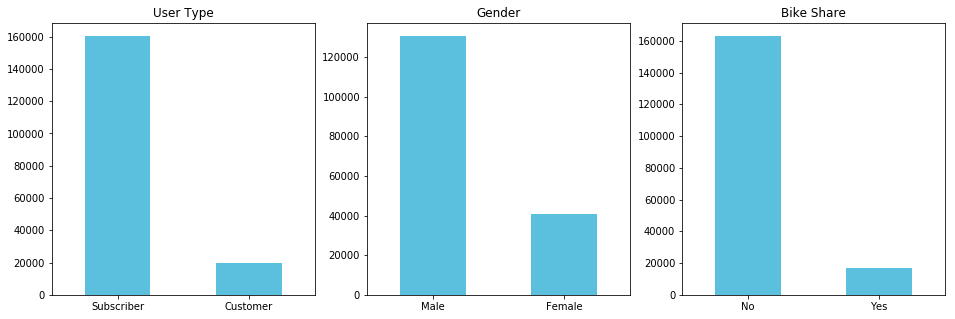

In [75]:
# plotting categorical variables together to get an idea of each variable's distribution.
fig, ax = plt.subplots(ncols=3, figsize=[16,5])

# subplot 1: user_type
gobike['user_type'].value_counts().plot(kind='bar', rot=0, color='#5bc0de', title='User Type', ax=ax[0]);

# subplot 2: member_gender
gobike['member_gender'].value_counts()[0:2].plot(kind='bar', rot=0, color='#5bc0de', title='Gender', ax=ax[1]);

# subplot 3: bike_share_for_all_trip
gobike['bike_share_for_all_trip'].value_counts().plot(kind='bar', rot=0, color='#5bc0de', title='Bike Share', ax=ax[2]);

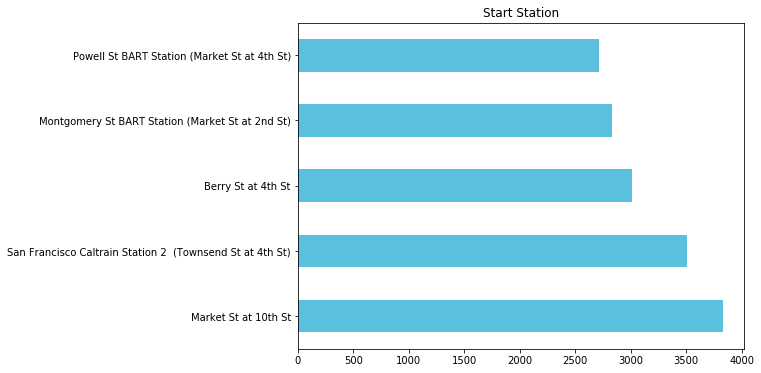

In [78]:
# plotting categorical variables together to get an idea of each variable's distribution.
plt.figure(figsize=(8,6))

gobike['start_station_name'].value_counts()[0:5].plot(kind='barh', rot=0, color='#5bc0de', title='Start Station');

The number of subscribers were more than customer and males were prefering majority trips as compared with females. We can also see that most of the users irrespective of type and gender were prefered not to share the bike during the trip. Maximum trips were started from Market St at 10th St station.

In [13]:
# calculating the member's age
def calculate_age(birthdate):
    today = date.today()
    age = today.year - birthdate
    
    return age

gobike['member_age'] = gobike['member_birth_year'].apply(lambda x: calculate_age(x))

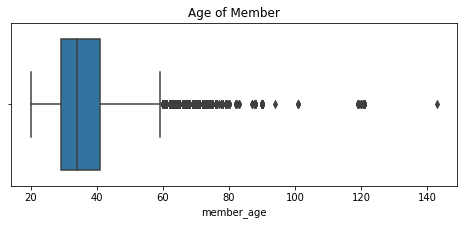

In [14]:
# plotting ordinal variable to find out the distratibution
plt.figure(figsize=(8,3))
default_color = sb.color_palette()[0]
sb.boxplot(data=gobike, x='member_age', color=default_color)
plt.title('Age of Member');

In [15]:
# do we need to remove outlier?
max_age = gobike.query('member_age > 140')
max_age

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
27370,1474,2019-02-25 09:28:42.1610,2019-02-25 09:53:17.0680,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878.0,Female,No,143.0


The Member's age ranges from 20 to 60 and seems like majority of them are between the age of 30 and 40. We can clearly see outlier here. The only member is having age greate than 140 which does not cause a significant deviation.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration variable took a long tail, so I have performed a log transformation here. Under the transformation, the data looked unimodel with the peak around 500 sec. Rides with over 2000 seconds represent only a small portion of the total number of rides.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigated member's age, a number of outlier points were identified. Overall, we can say that people are having age greater than 60 and around 80 really hire bikes and go on trip. As there is only 1 member having age 143, and couple around 120, removing these outliers does not cause any significant deviation.

## Bivariate Exploration

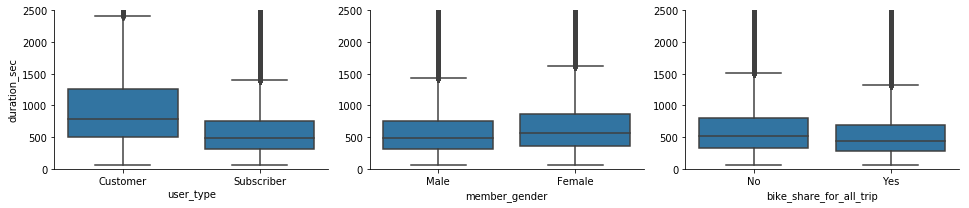

In [16]:
# bivariate plots of duration_sec vs. user_type, member_gender, bike_share_for_all_trip
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

def boxgrid(x, y, **kwargs):
    default_color=sb.color_palette()[0]
    sb.boxplot(x, y, color=default_color)

plt.figure(figsize=[10, 10]);
g = sb.PairGrid(data=gobike, y_vars=['duration_sec'], x_vars=categoric_vars, size=3, aspect=1.5);
g.map(boxgrid)
plt.ylim([0, 2500]);
plt.show();

Interesting results can be seen here in this bivariate plots. Though subscribers are more as comapred with customer but by looking at the duration, seems like customers are taking long duration trips. Same results are with gender, females are taking long duration trips as compared with males though number of males are more than females. If we look at the bike sharing during trip, people are not preferred to share bike even for long duration trip as well.

In [17]:
# extract day strings from start_time
gobike["start_time"] = pd.to_datetime(gobike["start_time"])
gobike['day'] = gobike['start_time'].dt.strftime("%A")

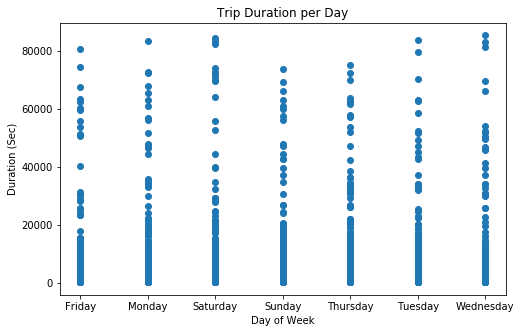

In [18]:
# bivariate plot for duration vs day
cat_var = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
gobike['day'] = pd.Categorical(gobike['day'], categories=cat_var, ordered=True)

plt.figure(figsize=[8,5])
plt.scatter(data=gobike, x='day', y='duration_sec')
plt.xlabel('Day of Week')
plt.ylabel('Duration (Sec)')
plt.title('Trip Duration per Day');

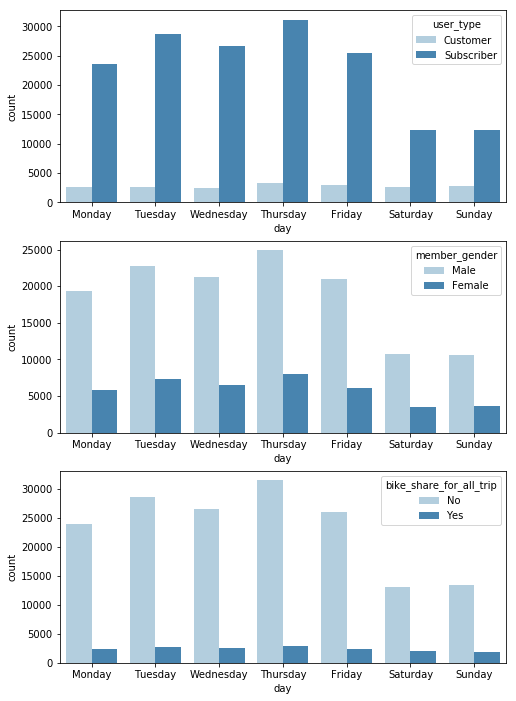

In [19]:
# bivariate plots of day vs. user_type, member_gender, bike_share_for_all_trip
plt.figure(figsize=[8, 12])

# subplot 1: day vs user_type
plt.subplot(3, 1, 1)
sb.countplot(data=gobike, x='day', hue='user_type', palette='Blues');

# subplot 1: day vs member_gender
plt.subplot(3, 1, 2)
sb.countplot(data=gobike, x='day', hue='member_gender', palette='Blues');

# subplot 1: day vs bike_share_for_all_trip
plt.subplot(3, 1, 3)
sb.countplot(data=gobike, x='day', hue='bike_share_for_all_trip', palette='Blues');

Surprisingly, people are prefer to take trips during weekdays than weekends, irrespective of the user type and gender. Most of the trips are taken on thrursday and tuesday followed by wedensday, friday and monday. We can also see that male subscribers are prefer to take trips and would like go alone.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The relationships observed in this part of investigation provide information that customers were prefered to take long duration trips whereas subscribers were prefered to take short trips. If we consider the gender then females were prefered long duration trips over males but maximum people avoid sharing of bikes during their trips. Most of these long duration trips were observed during weekdays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Expected relationships were found in association with user type, member gender and bike share per trip with total trips taken. The trip cout was higher during weekdays and it considerably drops during weekends. The male subscribers were prefered to take more trips than customer. One thing was common that people were avoid to share bike during long duration as well as total number of trips.

## Multivariate Exploration

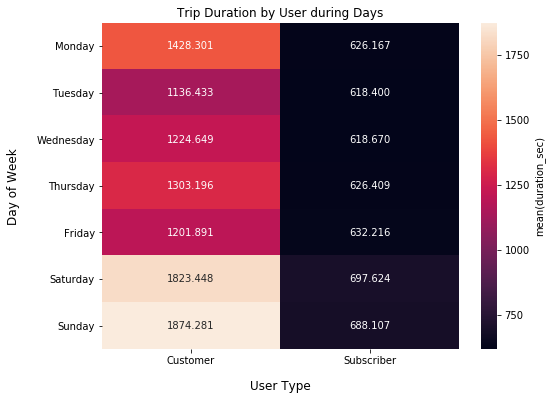

In [35]:
# multivariate plot for duration vs day, user_type
plt.figure(figsize=[8, 6])
gobike1 = gobike.groupby(['user_type', 'day']).mean()['duration_sec']
gobike1 = gobike1.reset_index(name='duration_sec_avg')
gobike1 = gobike1.pivot(index='day', columns='user_type', values='duration_sec_avg')
sb.heatmap(gobike1, annot=True, fmt='.3f', cbar_kws={'label': 'mean(duration_sec)'});
plt.ylabel('Day of Week', labelpad=16, fontsize=12)
plt.xlabel('User Type', labelpad=14, fontsize=12)
plt.title('Trip Duration by User during Days');

Interestingly, it appears that the maximum trip duration were for weekend trips taken by both Customer and Subscriber. There was considerable amount of duration difference between weekend trips and weekdays trips taken by Customer. The trip duration difference for Subscriber between weekend and weekdays is not that much.

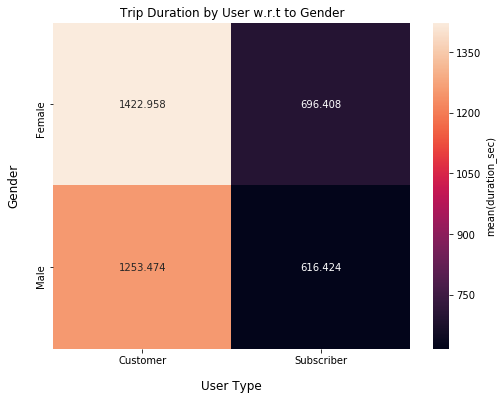

In [107]:
# multivariate plot for duration vs day, user_type, age
plt.figure(figsize=[8,6])
gobike2 = gobike.groupby(['user_type', 'member_gender']).mean()['duration_sec']
gobike2 = gobike2.reset_index(name='duration_sec_avg')
gobike2 = gobike2.pivot(index='member_gender', columns='user_type', values='duration_sec_avg')
sb.heatmap(gobike2, annot=True, fmt='.3f', cbar_kws={'label': 'mean(duration_sec)'});
plt.ylabel('Gender', labelpad=16, fontsize=12)
plt.xlabel('User Type', labelpad=14, fontsize=12)
plt.title('Trip Duration by User w.r.t to Gender');

This heatmap clears that female customers have taken long duration trips as compared with male customer and the difference is considerable. If we look at the subscriber, here also females have taken more long duration trips but the trip duration difference between males and females was very less.

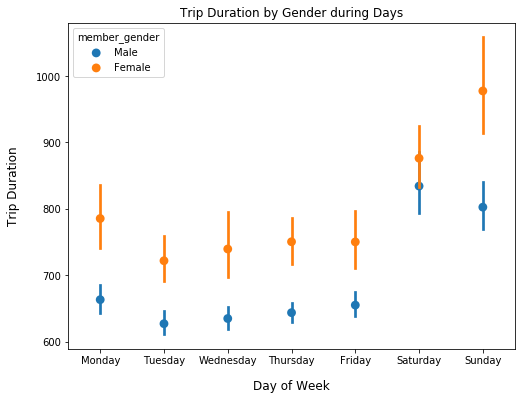

In [21]:
# multivariate plot for duration vs day, member_gender
plt.figure(figsize=[8, 6])
sb.pointplot(data=gobike, x='day', y='duration_sec', hue='member_gender', dodged=0.3, linestyles='')
plt.ylabel('Trip Duration', labelpad=16, fontsize=12)
plt.xlabel('Day of Week', labelpad=14, fontsize=12)
plt.title('Trip Duration by Gender during Days');

The gender graph also shows that maximum trips were taken over weekend by both males and females. There was small difference between trips taken by males and females on saturday which was considerably high on sunday. During weekdays, the trip duration difference between males and females were almost same. Still the picture is not clear with this graph.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


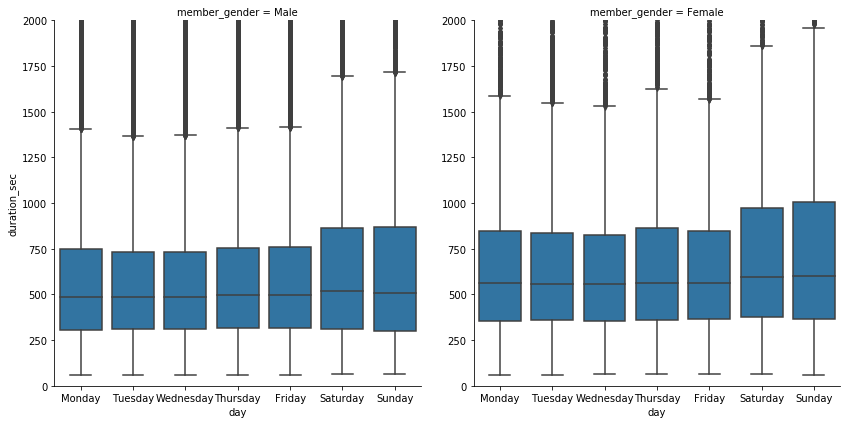

In [36]:
# multivariate boxplot for duration vs day, user_type
g = sb.FacetGrid(data=gobike, col='member_gender', size=6);
g.map(sb.boxplot, 'day', 'duration_sec');
plt.ylim([0, 2000]);

The box plot for each male and female give us more clear picture in terms of trip duration. The duration of trips taken by males on weekdays were almost same for all days. A slight difference on higher side can be seen on Thursday and Friday. The same pattern is observed if we looked at the female trip duration chart. Overall, females have taken slightly long duration trips on weekdays as compared with males.

Text(0.5,1,'Trip Duration by Gender during Days')

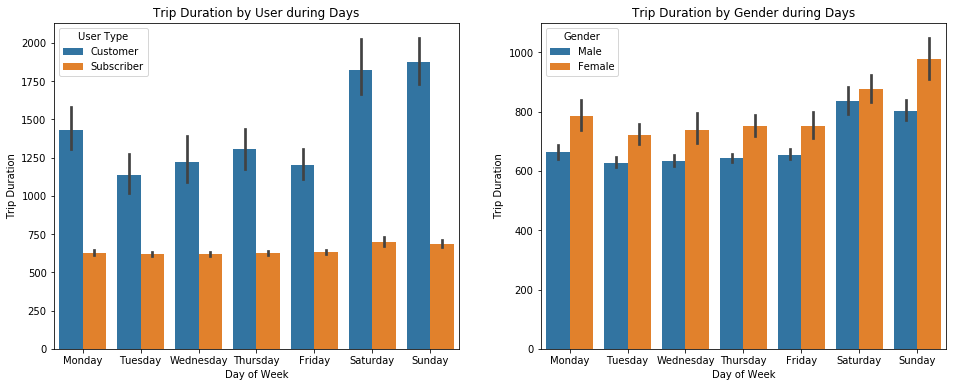

In [96]:
plt.figure(figsize=[16, 6])

# subplot 1: duration vs user_type and day
plt.subplot(1, 2, 1)
ax = sb.barplot(data=gobike, x='day', y='duration_sec', hue='user_type')
ax.legend(loc='best', title='User Type')
plt.xlabel('Day of Week')
plt.ylabel('Trip Duration')
plt.title('Trip Duration by User during Days')

# subplot 2: duration vs member_gender and day
plt.subplot(1, 2, 2)
ax = sb.barplot(data=gobike, x='day', y='duration_sec', hue='member_gender')
ax.legend(loc='best', title='Gender')
plt.xlabel('Day of Week')
plt.ylabel('Trip Duration')
plt.title('Trip Duration by Gender during Days')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration here showed that maximum long duration trips were taken over weekend by female customer. The same pattern was observed in case of subscriber. The trip duration on weekdays were almost same. The picture was clear for user_type and member_gender variables in association with duration_sec variable.

### Were there any interesting or surprising interactions between features?

Looking back at the point plots, it doesn't seem like there's a systematic interaction effect between the two categorical features. But both heatmaps shows the clear interactions between these categorical variables. The third categorical variable, bike_share_for_all_trip does not have any effect on other two.

## Conclusions

The ford gobike system data has an information about individual rides made in a bike-sharing system. After investigating the dataset, it can be seen that rides with over 2000 seconds represent only a small portion of the total number of rides. In the major portion of total number of rides, female customers have taken long duration trips over weekend as compared with male customers. The same pattern has observed in case of subscribers. The trip duration was comparitively smaller than weekend trips and remain almost same for all weekdays. Interestingly, people have not preferred to share the bike during the ride irrespective of user type and gender.